<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!👋</b>

Меня зовут Огурлиев Анзор, я буду ревьюером твоего проекта. Сразу хочу предложить тебе общаться на "ты", если тебе это неудобно, скажи мне об этом. Нам предстоит пройти с тобой через тернистый и от того интересный путь анализа данных! Можешь не переживать, я всегда помогу тебе, если у тебя возникнут вопросы)

По ходу твоей работы я буду оставлять свои комментарии, по выполненным тобой шагам. Попрошу тебя не удалять их, так мне будет проще отслеживать твой прогресс в случае повторной проверки.

Очень важно вести диалог и обсуждать те пункты, которые у тебя могли не получиться, поэтому, ты можешь оставлять свои комментарии, и мы обязательно во всем разберемся! Самое главное - выделяй свои комментарии удобным для тебя способом (цвет, рамка), но так, чтобы они отчетлитво отличались от моих комментариев. Так мы ни в чем не запутаемся)

Свои комментарии я буду выделять так: <font color='green'>зеленый</font>, <font color='gold'>желтый</font> и <font color='red'>красный</font> цвет, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Этот комментарий я буду оставлять, если твое решение оптимально для данного шага.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Это не означает, что ты совершил ошибку. Такими комментариями я буду отмечать места, где ты справился с задачей, но её можно решить ещё лучше. Также в таких комментариях я буду оставлять для тебя другие советы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Если решение, которое ты применил на определенном шаге, требует значительных изменений, то я буду оставлять такой комментарий. Тебе нужно будет подумать еще раз как правильным образом решить данный этап. Если ревью содержит такие комментарии, то я не смогу принять проект с первого раза.
</div>

P.S. В оглавлении комментария ты увидишь `V1` (`V1`, `V2`, `V3`) - это версия моего комментария, которая понадобится нам с тобой, чтобы не запутаться, если потребуется оставить тебе комментарии после первой проверки.

Проект "Статистический анализ данных"

У нас имеются данные о некоторых пользователях сервиса GoFast из нескольких городов, а также об их поездках и подписаках.
Мы проанализируем эти данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Стоит подробнее указать цели и задачи, которые будут в проекте выполняться.

In [52]:
#загрузим необходимые библиотеки:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom

#### Загрузка данных

In [53]:
#загрузим данные:

users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

#### Предобработка данных

##### Посмотрим информацию по первому датафрейму users_go, проверим наличие пропусков и явных дубликатов

In [54]:
users_go.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [55]:
#посмотрим общую информацию о датафрейме users_go:
display(users_go.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

In [56]:
#посмотрим количество пропусков:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [57]:
#посмотрим наличие явных дубликатов:
users_go.duplicated().sum()

31

Мы видим, что обнаружен 31 явный дубликат, пропусков нет, каждый столбец содержит 1565 строк, типы данных у каждого столбца верные. Поэтому необходимо удалить явные дубликаты.

In [58]:
users_go = users_go.drop_duplicates().reset_index(drop=True)

In [59]:
#посмотрим наличие явных дубликатов после удаления:
users_go.duplicated().sum()

0

##### Посмотрим информацию по первому датафрейму rides_go, проверим наличие пропусков и явных дубликатов

In [60]:
rides_go.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [61]:
#посмотрим общую информацию о датафрейме rides_go:
display(rides_go.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

In [62]:
#посмотрим количество пропусков:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [63]:
#посмотрим наличие явных дубликатов:
users_go.duplicated().sum()

0

Пропусков и явных дубликатов не обнаружено. Приведем столбец date к типу даты и создадим новый столбец с номером месяца.

In [64]:
#проверим, за какой период у нас представлены данные, если за один год, то можно просто добавить номера месяца:
display(rides_go['date'].min())
display(rides_go['date'].max())

'2021-01-01'

'2021-12-30'

In [65]:
#так как данные только за 2021 год,то номер месяца можно взять по месяцу из даты:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')
rides_go['month'] = rides_go['date'].dt.month
display(rides_go.head(5))

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Перед тем, как создать столбец с номером месяца можно было рассмотреть за какой период представлены данные, если там один год, то можно смело создавать столбец, если несколько лет, то возникает вопрос, достаточно ли только столбца с номером месяца или нужно добавить еще столбец с годом.

Мой комментарий: Добавила.

##### Посмотрим информацию по первому датафрейму subscriptions_go, проверим наличие пропусков и явных дубликатов

In [66]:
subscriptions_go.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [67]:
#посмотрим общую информацию о датафрейме subscriptions_go:
display(subscriptions_go.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

In [68]:
#посмотрим количество пропусков:
subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [69]:
#посмотрим наличие явных дубликатов:
subscriptions_go.duplicated().sum()

0

В датафрейме subscriptions_go пропусков и дубликатов нет, формат данных правильный.

Итак, на данном этапе мы загрузили данные, посмотрели общую информацию о них, устранили явные дубликаты, проверили наличие пропусков, привели дату в формат datetime и создали столбец с номером месяца.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Данные рассмотрела и обработала верно, молодец!

#### Исследовательский анализ данных - опишем и визуализируем общую информацию о пользователях и поездках

##### Частота встречаемости городов

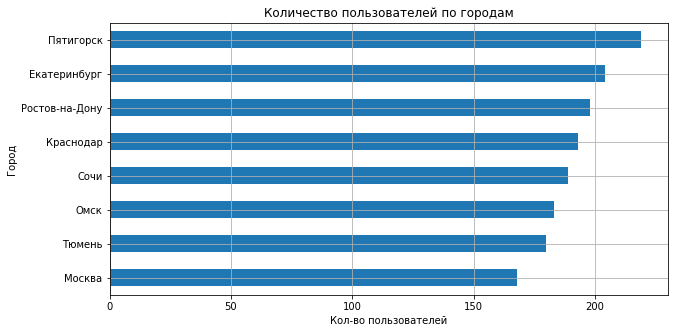

In [70]:
cities = users_go['city'].value_counts().sort_values(ascending=True).plot(kind='barh',grid=True, figsize=(10,5))
plt.title('Количество пользователей по городам')
plt.ylabel('Город')
plt.xlabel('Кол-во пользователей')
plt.show()

По графику видим, что максимальное число пользователей сервиса зарегистрировано в Пятигорске, затем Екатеринбург и снова несколько южных городов - Ростов-на-Дону, Краснодар, Сочи. Возможно, это связано с более длинным теплым сезоном в южных городах, а Екатеринбург - быстро развивающийся город с довольно нагруженным трафиком. Москва лишь на 8 месте, это связано, видимо, с тем, что по большому городу не очень удобно передвигаться на самокате, так как расстояния большие.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно построила диаграмму и описала данные.

##### Соотношение пользователей с подпиской и без

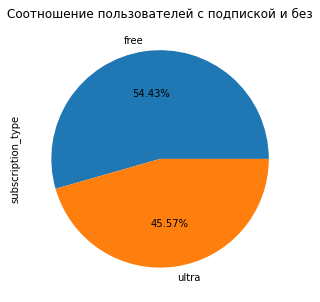

In [71]:
sub = users_go['subscription_type'].value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=(10,5))
plt.title('Соотношение пользователей с подпиской и без')
plt.show()

Мы видим, что пользователей без подписки (free) 54,06%, то есть больше половины. Возможно, это люди, которые пользуются сервисом разово, а не постоянно, либо просто не знают про выгоды подписки.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все так, верно

##### Возраст пользователей

In [72]:
#Посмотрим средний возраст пользователей:
display(users_go['age'].mean())

24.903520208604956

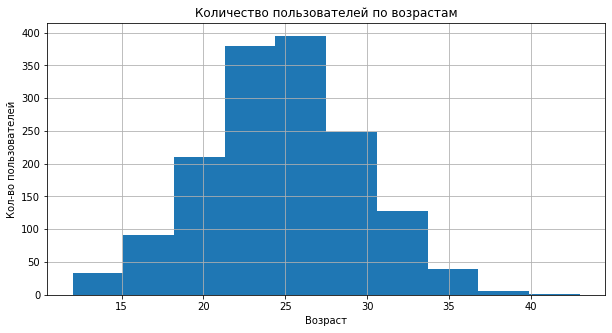

In [73]:
age = users_go['age'].hist(figsize=(10,5), grid=True,bins=10)
plt.title('Количество пользователей по возрастам')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Возраст')
plt.show()

Средний возраст пользователей - 24,9 лет,что видно и на графике тоже, самые большие возрастные группы пользователей от 15 до 35 лет, очевидно, что самокаты очень популярны у молодых людей.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Именно так, средний возраст пользователя почти 25 лет.

##### Расстояние, которое пользователь преодолел за одну поездку

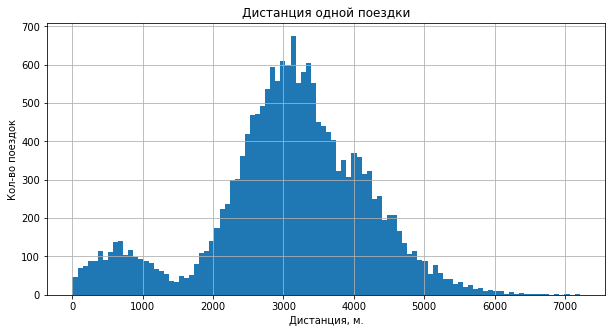

In [74]:
distance = rides_go['distance'].hist(figsize=(10,5), grid=True,bins=100)
plt.title('Дистанция одной поездки')
plt.ylabel('Кол-во поездок')
plt.xlabel('Дистанция, м.')
plt.show()

По графику видим, что медиана поездок около 3,1 км. за сеанс. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Некорректно здесь писать "в среднем", это пик, не обязательно он будет средним арифметическим. К тому же есть локальный максимум до 1000 метров, ты никак это не отметила, стоит на это обратить внимание. Предположи с чем это может быть связано.

Мой коммпентарий: не понятие "среднее", а медиану лучше использовать.
Также видим локальный максимум на значении до 1000 м, а пик приходится на значение около 700 метров, что может быть связано с тем, что многие используют самокат, чтобы доехать от работы/дома дло метро, а это как раз до 1000 км, как правило, для дистанции больше удобнее уже пользоваться общественным транспортом.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Да, все верно, молодец!

##### Продолжительность поездок

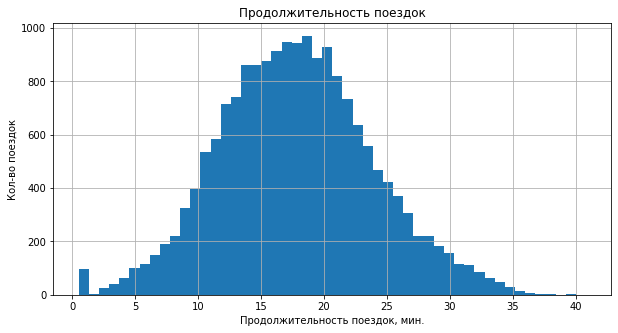

In [75]:
durations = rides_go['duration'].hist(figsize=(10,5), grid=True,bins=50)
plt.title('Продолжительность поездок')
plt.ylabel('Кол-во поездок')
plt.xlabel('Продолжительность поездок, мин.')
plt.show()

По графику видим, что среднее время одной поездки 15-25 минут, этого как раз достаточно чтобы проехать около 3 км.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Здесь все правильно.

Вывод. В этом разделе мы провели исследовательский анализ данных - описали и визуализировали общую информацию о пользователях и поездках. 
А именно, мы посмотрели в каких городах зарегистрировано больше всего пользователей - Пятигорске, Екатеринбурге, Ростове-на-Дону. Москва не в лидирующих позициях, так как по небольшим городам передвигаться на самокатах значительно удобнее.
Установили, что пользователей без подписки 54,06%, то есть больше половины. Возможно, это люди, которые пользуются сервисом разово, а не постоянно, либо просто не знают про выгоды подписки.
Средний возраст пользователей сервиса - около 25 лет, в целом, больше всего пользователей от 15 до 35 лет, это свзано с тем, что самокатами пользуются молодые люди.
Посмотрели дистанцию одной поездки и увидели, что в среднем одна поездка около 3 км. за сеанс.
А среднее время одной поездки 15-25 минут, чего как раз достаточно для преодоления средней дистанции в 3 км.

#### Объединение данных

##### Объединение трех таблиц с данными

In [76]:
#объединим наши датафреймы:
total = users_go.merge(rides_go)
display(total.head(5))

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


In [77]:
total = total.merge(subscriptions_go)
display(total.head(5))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [78]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Объединение датафреймов прошло успешно. Создадим еще два датафрейма - данные о пользователях без подписки и данные с пользователями с подпиской, а также проанализируем данные о расстоянии и времени поездок для этих категорий.

##### Данные о пользователях без подписки

In [79]:
#датафрейм с данными о пользователях без подписки:
without_sub = total.query('subscription_type=="free"')
display(without_sub.head(5))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


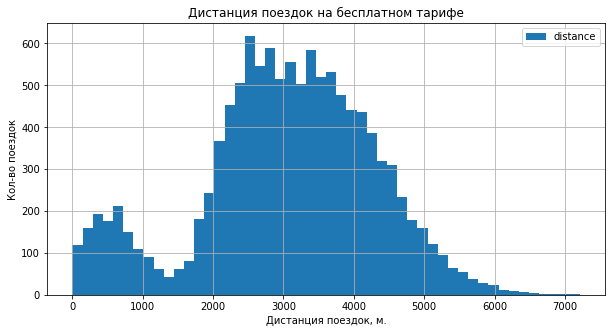

In [80]:
#посмотрим график зависимости расстояния от числа пользователей без подписки:
d_without_s = without_sub.plot(kind='hist', y='distance',figsize=(10,5), grid=True,bins=50)
plt.title('Дистанция поездок на бесплатном тарифе')
plt.ylabel('Кол-во поездок')
plt.xlabel('Дистанция поездок, м.')
plt.show()

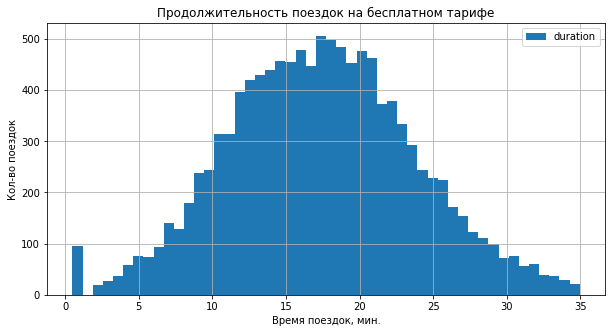

In [81]:
#посмотрим график зависимости времени поездки от числа пользователей без подписки:
d_without_s = without_sub.plot(kind='hist', y='duration',figsize=(10,5), grid=True,bins=50)
plt.title('Продолжительность поездок на бесплатном тарифе')
plt.ylabel('Кол-во поездок')
plt.xlabel('Время поездок, мин.')
plt.show()

Видим по этим двум графикам, что для бесплатного тарифа наиболее часто встречаются поездки длиной от 2 до 4,5 км, длящиеся от 10 до 25 минут.

##### Данные о пользователях с подпиской

In [82]:
#датафрейм с данными о пользователях с подпиской:
with_sub = total.query('subscription_type=="ultra"')
display(with_sub.head(5))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


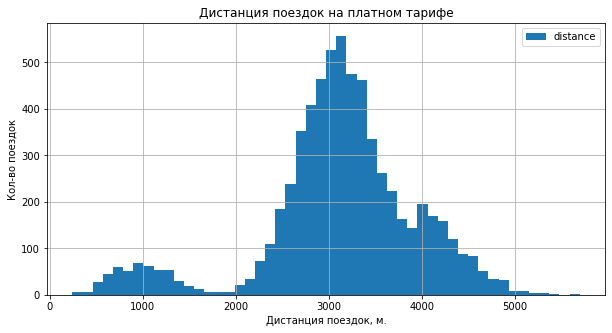

In [83]:
#посмотрим график зависимости расстояния от числа пользователей с подпиской:
d_with_s = with_sub.plot(kind='hist', y='distance',figsize=(10,5), grid=True,bins=50)
plt.title('Дистанция поездок на платном тарифе')
plt.ylabel('Кол-во поездок')
plt.xlabel('Дистанция поездок, м.')
plt.show()

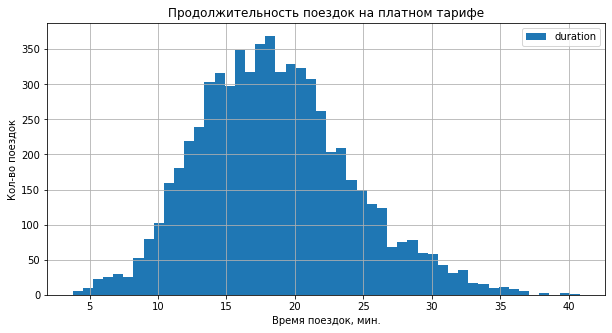

In [84]:
#посмотрим график зависимости времени поездки от числа пользователей с подпиской:
d_with_s = with_sub.plot(kind='hist', y='duration',figsize=(10,5), grid=True,bins=50)
plt.title('Продолжительность поездок на платном тарифе')
plt.ylabel('Кол-во поездок')
plt.xlabel('Время поездок, мин.')
plt.show()

Видим по этим двум графикам, что для бесплатного тарифа наиболее часто встречаются поездки длиной от 2,5 до 3,5 км, длящиеся от 13 до 20 минут.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Можно было совместить графики, на одном вывести распределение расстояния поездок пользователей с подпиской и без разными цветами. Аналогично и гистограммы с временем поездок.

Вывод. Мы объединили наши три датафрейма. Создали еще два датафрейма - данные о пользователях без подписки и данные с пользователями с подпиской, а также проанализировали данные о расстоянии и времени поездок для этих категорий. Можно сделать вывод, что пользователи без подписки совершают, в среднем, более долгие поездки на более длинные дистанции, это, возможно, связано с тем, что без подписки разовые поездки, такие как обзорные прогулки по городу, а по подписке регулярные задачи добираться по привычному маршруту.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> По описанию все хорошо, верно отметила в чем схожи и чем отличаются пользователи.

#### Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма total. Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [85]:
#продолжительность каждой поездки округлим до следующего целого числа:
total['duration']=np.ceil(total['duration'])
total.sort_values(by='month').head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
16824,1445,Даниил,25,Краснодар,free,2523.138615,16.0,2021-01-10,1,8,50,0
16825,1445,Даниил,25,Краснодар,free,4399.199954,15.0,2021-01-10,1,8,50,0
16826,1445,Даниил,25,Краснодар,free,3837.799319,23.0,2021-01-14,1,8,50,0
13337,1201,Николай,20,Ростов-на-Дону,free,2277.420386,10.0,2021-01-24,1,8,50,0


In [51]:
full_data = pd.pivot_table(total, index=['month','user_id'],
                           values=['distance','duration','name','minute_price',
                                   'subscription_fee', 'start_ride_price'],
                                   aggfunc={'distance':{'count','sum'},'duration':'sum',
                                            'minute_price':'mean', 'subscription_fee':'mean',
                                            'start_ride_price':'mean'})
                                   

full_data.columns = ['count','distance','duration','minute_price','start_ride_price','subscription_fee']
full_data.head(10)

count     distance  duration  minute_price  start_ride_price  \
month user_id                                                                 
1     1            2  7027.511294      42.0             6                 0   
      3            1  3061.777147      13.0             6                 0   
      5            1  3914.646990      13.0             6                 0   
      7            2  6478.080979      28.0             6                 0   
      12           1  3577.151148      33.0             6                 0   
      13           2  6687.987446      42.0             6                 0   
      14           2  7699.643820      35.0             6                 0   
      15           1  4187.621459      39.0             6                 0   
      20           1  3516.719208      29.0             6                 0   
      22           1  3058.692225      13.0             6                 0   

               subscription_fee  
month user_id                    
1     1                     199  
      3                     199  
      5                     199  
      7                     199  
      12                    199  
      13                    199  
      14                    199  
      15                    199  
      20                    199  
      22                    199

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Нужно сначала округлить длительность поездок, а потом уже  считать сводную таблицу.

Мой комментарий: Поменяла местами.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отлично!

##### Посчитаем помесячную выручку для каждого пользователя

Добавим столбец с помесячной выручкой, которую принес каждый пользователь. Нужно учитывать наличие подписки.

In [86]:
full_data['month_revenue'] = (full_data['start_ride_price']*full_data['count']+
                             full_data['minute_price']*full_data['duration']+
                             full_data['subscription_fee'])
full_data.head(5)

count     distance  duration  minute_price  start_ride_price  \
month user_id                                                                 
1     1            2  7027.511294      42.0             6                 0   
      3            1  3061.777147      13.0             6                 0   
      5            1  3914.646990      13.0             6                 0   
      7            2  6478.080979      28.0             6                 0   
      12           1  3577.151148      33.0             6                 0   

               subscription_fee  month_revenue  
month user_id                                   
1     1                     199          451.0  
      3                     199          277.0  
      5                     199          277.0  
      7                     199          367.0  
      12                    199          397.0

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно рассчитала доход от поездок.

In [36]:
#выручка за весь год для всех пользователей:
full_data['month_revenue'].sum()

3853677.0

Вывод. Мы создали датафрейм с агрегированными данными о поездках на основе датафрейма total. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, а также вычислили помесячную выручку для каждого пользователя, и в сумме видим, что за год выручка сервиса составила 3,8 млн. руб.

#### Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Необходимо проверить гипотезу о том, что пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе. 
Нулевая гипотеза H0: Время поездки пользователей на подписке ultra равно времени поездки пользователей без подписки (free).
Тогда альтернативная гипотеза H1: Время поездки пользователей на подписке ultra больше времени поездки пользователей без подписки (free).

In [37]:
#уровень статистической значимости примем за альфа равную 0.05, 
#если p-value окажется меньтше него, то отвергаем нулевую гипотезу

alpha = 0.05

ultra = with_sub['duration']
free = without_sub['duration']

results = st.ttest_ind(ultra, free, alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Значит, отвергнув нулевую гипотезу, мы делаем вывод, что утверждение о том, что время поездки с платной подпиской равно времени поездки без подписки, неверно.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно сформулировала и проверила гипотезу, все верно.

##### Расстояние, которое проезжают пользователи с подпиской, не превышает 3130 м.?

Расстояние в 3130 метров - оптимальное с точки зрения износа самоката. Проверим нулевую гипотезу H0: Расстояние одной поездки пользователей с подпиской ultra равно 3130 метров. H1: Расстояние пользователей с подпиской меньше 3130 м.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Неправильно сформулировала альтернативную гипотезу. Мы хотим проверить, что поездки именно превышают оптимальное расстояние, так как это приводит к большему износу самоката. Поэтому альтернативную гипотезу нужно сформулировать так, что пользователи проезжают больше оптимального расстояния.

Мой комментарий: Да, верно, неправильно написала, Альтернативную гипотезу нужно сформулировать так - H1: Расстояние пользователей с подпиской больше оптимального расстояния 3130 м. Тогда в коде меняем параметр в t-тесте на 'greater'.

In [87]:
alpha = 0.05

ultra_distance = with_sub['distance']
interest_dist = 3130

results = st.ttest_1samp(ultra_distance, interest_dist, alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Итак, мы не можем утверждать, что расстояние одной поездки пользователей с подпиской не превышает 3130 метров.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Гипотезу правильно сформулировала, только вывод неправильный, не удалось отвергнуть нулевую гипотезу, значит пользователи меньше оптимального проезжают. А ты пишешь, что они проезжают больше.

##### Помесячная выручка пользователей с подпиской выше, чем без подписки?

H0: Помесячная средняя выручка пользователей с подпиской равна помесячной средней выручке пользователей без подписки.
H1: Помесячная средняя выручка пользователей с подпиской больше помесячной средней выручки пользователей без подписки.

In [39]:
alpha = 0.05

ultra_rev = full_data.loc[full_data['subscription_fee']>0, 'month_revenue']
free_rev = full_data.loc[full_data['subscription_fee']==0, 'month_revenue']

results = st.ttest_ind(ultra_rev, free_rev, alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 2.8130926188487286e-35
Отвергаем нулевую гипотезу


Таким образом, отвергнув нулевую гипотезу, мы можем утверждать, что помесячная средняя выручка пользователей с подпиской больше помесячной средней выручки пользователей без подписки.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Данную гипотезу проверила абсолютно верно, так держать!

##### Количество обращений в тех.поддержку до и после обновлений серверов

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Здесь нужно использовать двухвыборочный t-тест для двух зависимых выборок: scipy.stats.ttest_rel(). Тут аргументы - два набора данных - парные выборки до и после изменения. И необходимо проверить нулевую гипотезу о равенстве средних значений количества обращений в техническую поддержку до и после обновления сервера.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> А альтернативная гипотеза как сформулирована будет?

Мой комментарий: Альтерантивна гипотеза будет сформулирована так: Средние значения количества обращений в тех. поддержку до и после обновления серверов не равны.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Так формулировать гипотезу неправильно, мы просто узнаем равны они или нет, а нам важно понять снизилось ли число обращений.

#### Общий вывод

Итак, мы исследовали данные о пользователях сервиса аренды самокатов GoFast. Работа была проделана в следующем порядке:
<p>
<ul>
<li>Загрузили данные - три датафрейма users_go, rides_go, subscriptions_go - посмотрели общую информацию о них, устранили явные дубликаты, проверили наличие пропусков, привели дату в формат datetime и создали столбец с номером месяца.</li>
<p>
<li>Затем провели исследовательский анализ данных - описали и визуализировали общую информацию о пользователях и поездках. 
    <p>А именно, мы посмотрели в каких городах зарегистрировано больше всего пользователей - Пятигорске, Екатеринбурге, Ростове-на-Дону. Москва не в лидирующих позициях, так как по небольшим городам передвигаться на самокатах значительно удобнее.
<p>Установили, что пользователей без подписки 54,06%, то есть больше половины. Возможно, это люди, которые пользуются сервисом разово, а не постоянно, либо просто не знают про выгоды подписки.
<p>Средний возраст пользователей сервиса - около 25 лет, в целом, больше всего пользователей от 15 до 35 лет, это свзано с тем, что самокатами пользуются молодые люди.
<p>Посмотрели дистанцию одной поездки и увидели, что в среднем одна поездка около 3 км. за сеанс.
<p>А среднее время одной поездки 15-25 минут, чего как раз достаточно для преодоления средней дистанции в 3 км.
<p>
<li>После этого мы объединили наши три датафрейма. Создали еще два датафрейма - данные о пользователях без подписки и данные с пользователями с подпиской, а также проанализировали данные о расстоянии и времени поездок для этих категорий. Можно сделать вывод, что пользователи без подписки совершают, в среднем, более долгие поездки на более длинные дистанции, это, возможно, связано с тем, что без подписки разовые поездки, такие как обзорные прогулки по городу, а по подписке регулярные задачи добираться по привычному маршруту.</li>
<p>
<li>После, мы создали датафрейм с агрегированными данными о поездках на основе датафрейма total. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, а также вычислили помесячную выручку для каждого пользователя, и в сумме видим, что за год выручка сервиса составила 3,8 млн. руб.
</li>
<p>
<li>Затем были проверены некоторые гипотезы, которые могут помочь аналитикам принять решения о дальнейшем развитии сервиса. На их основе делаем выводы, что утверждение о том, что время поездки с платной подпиской равно времени поездки без подписки, неверно. Еще мы не можем утверждать, что расстояние одной поездки пользователей с подпиской не превышает 3130 метров. И проверив третью гипотезу, мы можем утверждать, что помесячная средняя выручка пользователей с подпиской больше помесячной средней выручки пользователей без подписки. После дано объяснение применения двухвыборочного t-теста для двух зависимых выборок: scipy.stats.ttest_rel(). Тут аргументы - два набора данных - парные выборки до и после изменения.</li>
<p>
<li>На основе всей проделанной работы, хочется дать рекомендации - рекламировать, предлагать платную подписку ultra все большему числу пользователей, так как пользователи с этой подпиской более выгодны для этого сервиса аренды самокатов.</li>

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В итоговом выводе нужно достаточно подробно написать основные пункты выявленных зависимостей. Стоит доработать вывод с учетом моих комментариев по ходу работы. В итоговом выводе также старайся оставлять рекомендации для последующих шагов. Например рекомендации, что можно обработать и проанализировать другие признаки, на что твоим коллегам стоить обратить внимание.
    
Важно структурировано писать вывод, разделять его на блоки, абзацы, выделять основные пункты визуально, сейчас сплошной текст, в нем сложно основные выводы увидеть. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный вывод, все четко, понятно и структурировано. Вывод в полной мере отражает существующие зависимости, и по нему можно принимать дальнейшие решения.
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! Я уверен, что ты приложила все усилия, чтобы сделать этот проект. Это видно по твоей работе, а сформулированные выводы отражают, насколько успешно ты осваиваешь материал.

**Отмечу отдельные положительные моменты проекта🙂**:

* Ты полностью следовала всем этапам выполнения задания и справилась почти со всем. Хорошая работа!
* Отдельно выделю некоторые выводы, которые ты смогла сформулировать абсолютно точно!
* У тебя опрятный и читаемый код. Возможно это звучит банально, однако при работе с чужим кодом это крайне важно)


**На что стоит обратить внимание🤓**:

* Важно доработать итоговый вывод.
* Нужно скорректировать проверку гипотезы.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid Chocolate 2px; padding: 40px">

Ты отлично справилась с данной работой! Видно, как ты успешно осваиваешь материал, применяешь полученные знания на практике. Мне было очень приятно проверять твою работу, надеюсь, мои комментарии и советы были для тебя полезными.

**Желаю удачи в последующем обучении и исследованиях!**😉